In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("Recruitment_Data_updated.csv")
df.head()

,attrition,performance_rating,sales_quota_pct,recruiting_source
0,0.000707,2.976686,0.604739,Applied Online
1,-0.019452,2.989157,0.396567,NaN
2,-0.009998,2.993355,0.206242,Applied Online
3,-0.003004,1.989966,-0.475037,NaN
4,-0.025405,3.016559,0.345470,Campus


In [17]:
df.shape

(107354, 4)

In [18]:
# Checking for null values in the columns.
null_values = df.isnull().sum() 
print(null_values)

attrition                 0
performance_rating        0
sales_quota_pct           0
recruiting_source     49601
dtype: int64


In [19]:
# Recruitment source has around 45% null values. Replacing them with Unknown to keep data. 
df['recruiting_source'].fillna('unknown', inplace=True)

C:\Users\JAGUVAR\AppData\Local\Temp\ipykernel_17672\2123924740.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.




In [20]:
## I am analyzing the average performance rating segmented by recruitment source.
attrition_summary_1 = df.groupby('recruiting_source')['performance_rating'].mean()
attrition_summary_1_sorted = attrition_summary_1.sort_values(ascending=False)
print(attrition_summary_1_sorted)

recruiting_source
Referral          2.906395
Search Firm       2.897311
unknown           2.895248
Campus            2.893206
Applied Online    2.891409
Name: performance_rating, dtype: float64


In [21]:
# I am analyzing the average sales segmented by recruitment source.
attrition_summary_2 = df.groupby('recruiting_source')['sales_quota_pct'].mean() 
# Sort the DataFrame by 'sales_quota_pct' in descending order
attrition_summary_2_sorted = attrition_summary_2.sort_values(ascending=False)
print(attrition_summary_2_sorted)

recruiting_source
Search Firm       1.103426
unknown           1.085862
Applied Online    1.080959
Campus            1.076408
Referral          1.075538
Name: sales_quota_pct, dtype: float64


In [22]:
# I am analyzing the average attrition rate segmented by recruitment source.
attrition_summary_3 = df.groupby('recruiting_source')['attrition'].mean() 
# Sort the DataFrame by 'sales_quota_pct' in descending order
attrition_summary_3_sorted = attrition_summary_2.sort_values(ascending=False)
print(attrition_summary_3_sorted)

recruiting_source
Search Firm       1.103426
unknown           1.085862
Applied Online    1.080959
Campus            1.076408
Referral          1.075538
Name: sales_quota_pct, dtype: float64


In [23]:
# To find the recruitment_source with the lowest attrition rate with the highest performance_rating and Sales_quota_pct, 
# I am Combining the three aggregated Series into a single data frame and identifying the recruiting source that meets the criteria.

# Aggregating metrics
attrition_summary_1 = df.groupby('recruiting_source')['performance_rating'].mean()
attrition_summary_2 = df.groupby('recruiting_source')['sales_quota_pct'].mean()
attrition_summary_3 = df.groupby('recruiting_source')['attrition'].mean()

# Combining the results into a single DataFrame
summary_df = pd.DataFrame({
    'performance_rating': attrition_summary_1,
    'sales_quota_pct': attrition_summary_2,
    'attrition': attrition_summary_3
})

# Sorting the DataFrame by the desired criteria
summary_df_sorted = summary_df.sort_values(by=['attrition', 'performance_rating', 'sales_quota_pct'], 
                                           ascending=[True, False, False])

# Displaying the recruitment source with the least attrition and highest performance/sales quota pct
best_recruiting_source = summary_df_sorted.head()
print("Recruiting source with the least attrition and highest performance rating & sales quota pct:")
print(best_recruiting_source)

Recruiting source with the least attrition and highest performance rating & sales quota pct:
                   performance_rating  sales_quota_pct  attrition
recruiting_source                                                
Search Firm                  2.897311         1.103426   0.208177
unknown                      2.895248         1.085862   0.212437
Applied Online               2.891409         1.080959   0.213370
Referral                     2.906395         1.075538   0.214920
Campus                       2.893206         1.076408   0.215109


In [9]:
# The analysis shows that "search firm" is the best recruitment source with high-performance ratings, high sales, and less attrition.
# The sales number also indicates that the "search firm" has the highest sales of all the recruitment sources.

In [ ]:
# We wll use ggplot to 
!pip install plotnine
from plotnine import ggplot, aes, geom_point, geom_line, theme_minimal, labs, geom_bar, position_dodge 
from plotnine import display

In [33]:
# Create the ggplot bar chart
plot = (
    ggplot(df, aes(x='recruiting_source', y='attrition', fill='recruiting_source')) +
    geom_bar(stat='identity', show_legend=False) +  # Bar plot with attrition as the y-axis
    theme_minimal() +  # Minimal theme for clean presentation
    labs(
        title='Attrition Numbers by Recruiting Source',
        x='Recruiting Source',
        y='Attrition Numbers'
    )
)

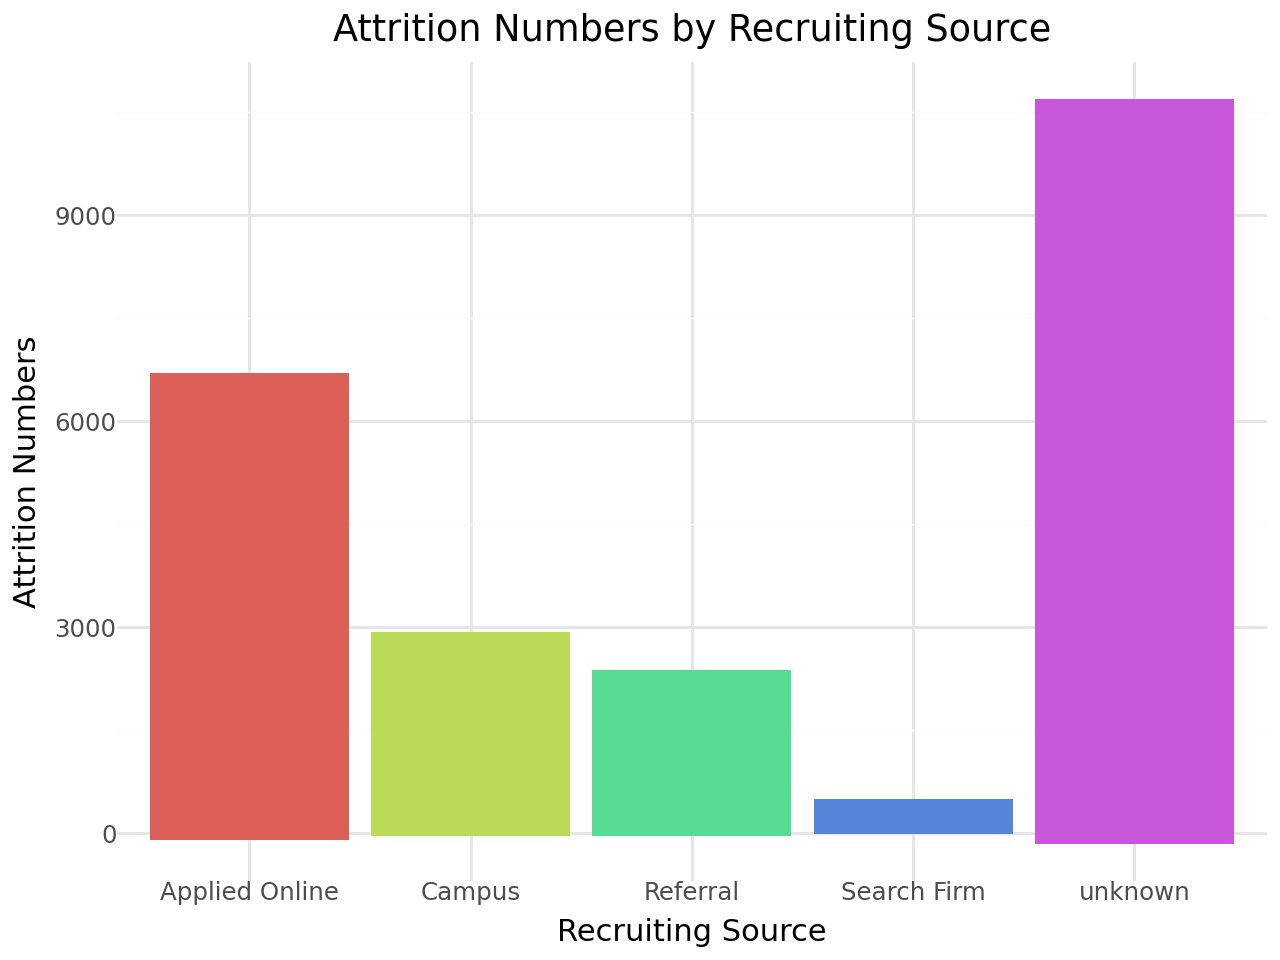

In [45]:
display(plot)

In [ ]:
plt.savefig('plot.png')

In [55]:
plot_2 = (
    ggplot(df, aes(x='recruiting_source', y='sales_quota_pct', fill='recruiting_source')) +
    geom_bar(stat='identity', show_legend=False) +  # Bar plot with attrition as the y-axis
    theme_minimal() +  # Minimal theme for clean presentation
    labs(
        title='Sales differences by Recruiting Source',
        x='Recruiting Source',
        y='sales_quota_pct'
    )
)

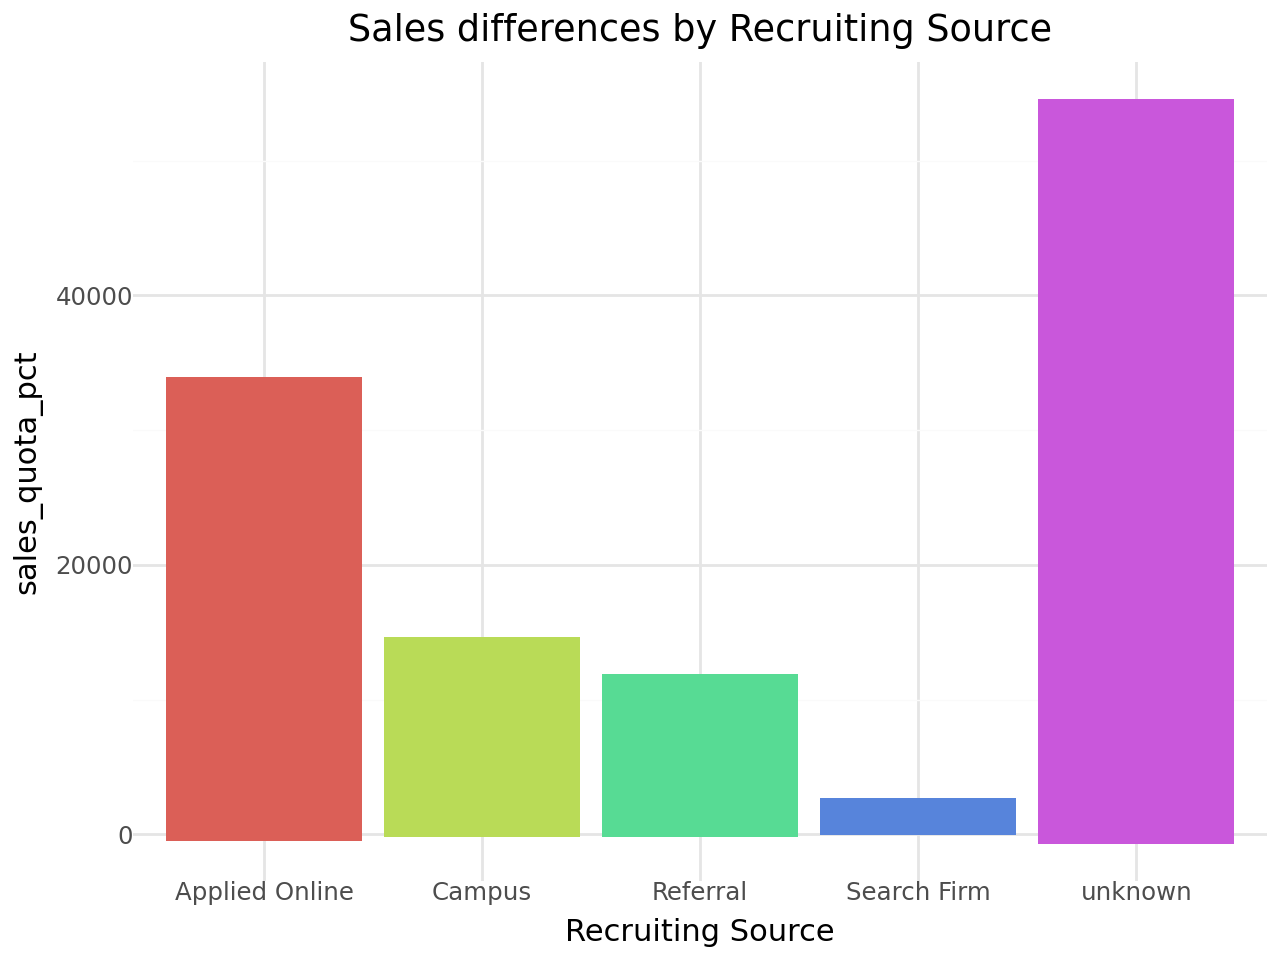

In [57]:
display(plot_2)

In [ ]:
plt.savefig('plot_2.png')